# Australia 'Data' Salary EDA and Data Prep

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns

style.use('ggplot')

%matplotlib inline

In [2]:
# read in the data that has been scraped and cleaned
salary = pd.read_csv('./datasets/salary.csv')

In [3]:
salary.shape

(1396, 8)

In [4]:
salary.head(2)

,Unnamed: 0,title,salary,classification,summary,title_cat,state,position_lvl
0,0,Data Migration Analyst - Legal Software,0,Information & Communication Technology,The Global Transition department is responsibl...,Data Analyst,NSW,-1
1,1,Data Analyst,0,Information & Communication Technology,I'm looking to speak to mid to senior level Da...,Data Analyst,QLD,-1


In [5]:
# drop ['Unnamed: 0'] columns
salary.drop(columns = ['Unnamed: 0'], inplace=True)

In [6]:
salary.tail(2)

,title,salary,classification,summary,title_cat,state,position_lvl
1394,Data Scientist,1,Information & Communication Technology,Your new company Financial Firm in Melbourne ...,Data Scientist,VIC,-1
1395,Solution Architect - Analytical Software Techn...,1,Information & Communication Technology,About Us GE (NYSE:GE) drives the world forward...,Data Scientist,VIC,-1


In [7]:
salary.isnull().sum()

title             0
salary            0
classification    0
summary           1
title_cat         0
state             0
position_lvl      0
dtype: int64

Create and compare at least two models for each section. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).

Section 1: Job Salary Trends
Section 2: Job Category Factors

In [8]:
salary_high_count = salary['salary'].value_counts()
salary_high_count

0    918
1    478
Name: salary, dtype: int64

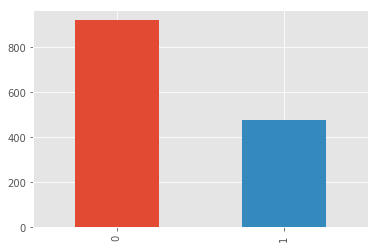

In [9]:
salary_high_count.plot(kind='bar')

In [10]:
classification_count = salary['classification'].value_counts()
classification_count

Information & Communication Technology    546
Engineering                                98
Science & Technology                       81
Education & Training                       79
Accounting                                 74
Government & Defence                       70
Banking & Financial Services               59
Healthcare & Medical                       58
Administration & Office Support            49
Marketing & Communications                 42
Manufacturing, Transport & Logistics       41
Sales                                      33
Mining, Resources & Energy                 30
Consulting & Strategy                      27
Trades & Services                          20
Human Resources & Recruitment              17
Construction                               16
Real Estate & Property                     12
Call Centre & Customer Service             12
Design & Architecture                       8
Community Services & Development            7
Farming, Animals & Conservation   

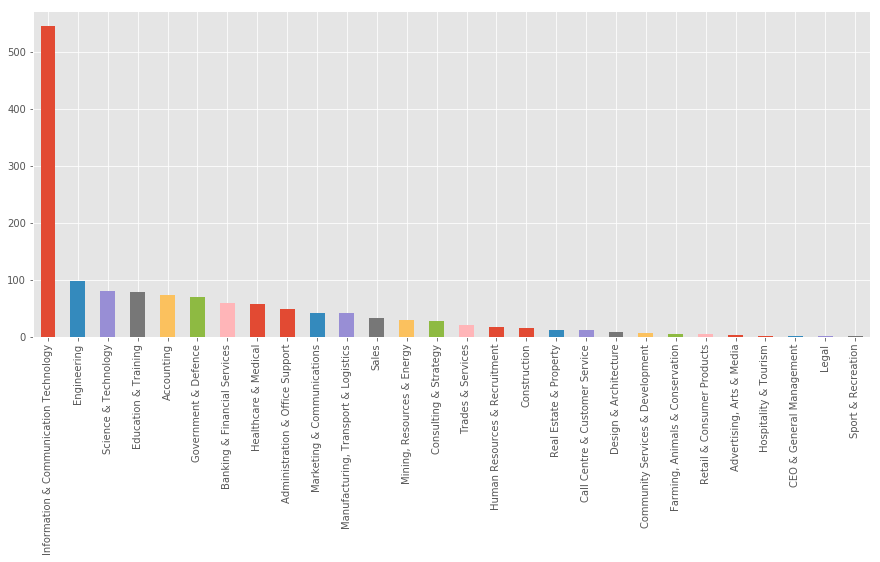

In [11]:
#salary['classification'].value_counts().plot(kind='bar', figsize=(15, 6))
classification_count.plot(kind='bar', figsize=(15, 6))

In [12]:
job_level_by_category = salary.groupby(['classification'])['position_lvl'].value_counts()
job_level_by_category

classification                          position_lvl
Accounting                              -1               61
                                         1               12
                                         0                1
Administration & Office Support         -1               46
                                         0                2
                                         1                1
Advertising, Arts & Media               -1                2
                                         1                1
Banking & Financial Services            -1               29
                                         1               29
                                         0                1
CEO & General Management                 1                1
Call Centre & Customer Service          -1               10
                                         0                1
                                         1                1
Community Services & Development        -1     

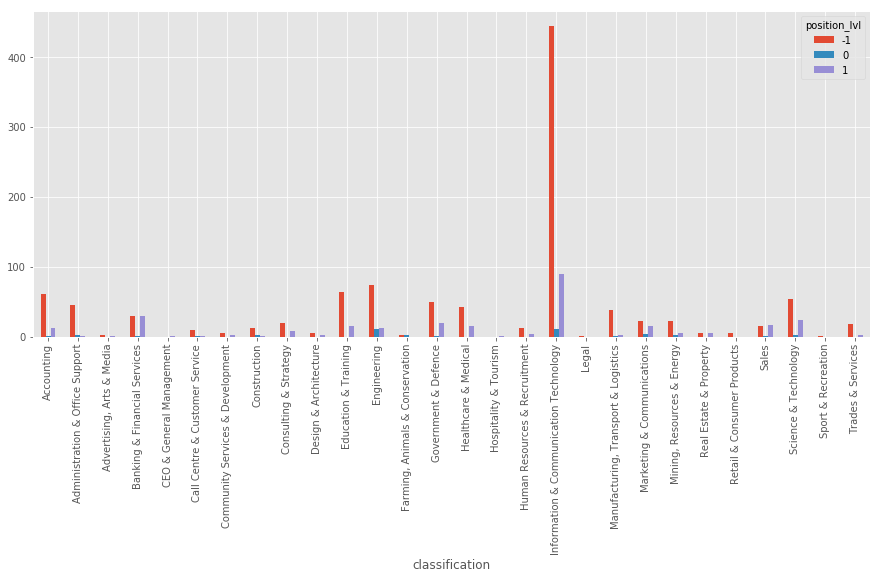

In [13]:
#salary.groupby(['classification'])['position_lvl'].value_counts()
job_level_by_category.sort_values().unstack().plot(kind='bar', figsize=(15, 6))

In [14]:
# see based on for each position level, how many are fallened into which groups
job_count_by_level = salary.groupby(['position_lvl','salary'])['salary'].count()
job_count_by_level

position_lvl  salary
-1            0         759
              1         306
 0            0          40
              1           3
 1            0         119
              1         169
Name: salary, dtype: int64

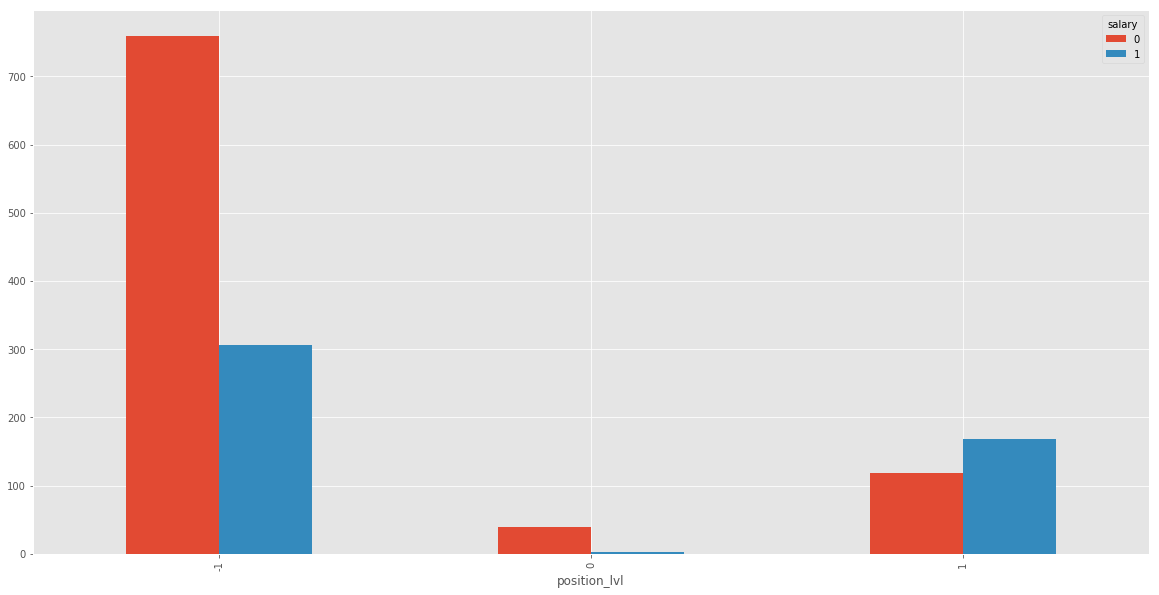

In [15]:
# salary.groupby(['position_lvl','salary'])['salary'].count()
job_count_by_level.unstack().plot(kind = 'bar', figsize=(20, 10))

# Observevation based on graphs above and below related to DATA:

* Information & Communication Technology has highest demands for "Data" related jobs
* Mostly are in the middle position level (level = 1) not junior = 0, and not senior = 2)
* Jobs related data are listed in all job classification

In [16]:
job_by_state = salary.groupby(['state'])[['salary']].count()
job_by_state

,salary
state,
ACT,60
NSW,593
NT,11
QLD,218
SA,37
TAS,5
VIC,364
WA,108


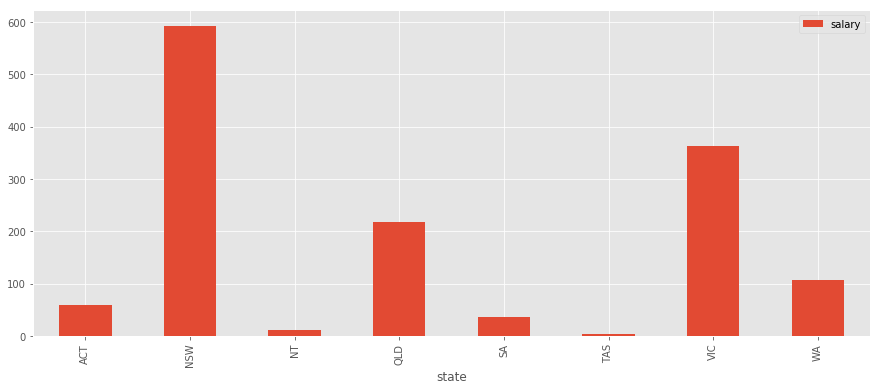

In [17]:
# salary.groupby(['state'])[['salary']].count()
job_by_state.plot(kind='bar', figsize=(15, 6))

* NSW has the highest job listing, followed by VIC
* TAS has the lowest demand

In [18]:
job_state_by_cat = salary.groupby(['state','salary'])['salary'].count()
job_state_by_cat

state  salary
ACT    0          31
       1          29
NSW    0         345
       1         248
NT     0           7
       1           4
QLD    0         156
       1          62
SA     0          29
       1           8
TAS    0           5
VIC    0         258
       1         106
WA     0          87
       1          21
Name: salary, dtype: int64

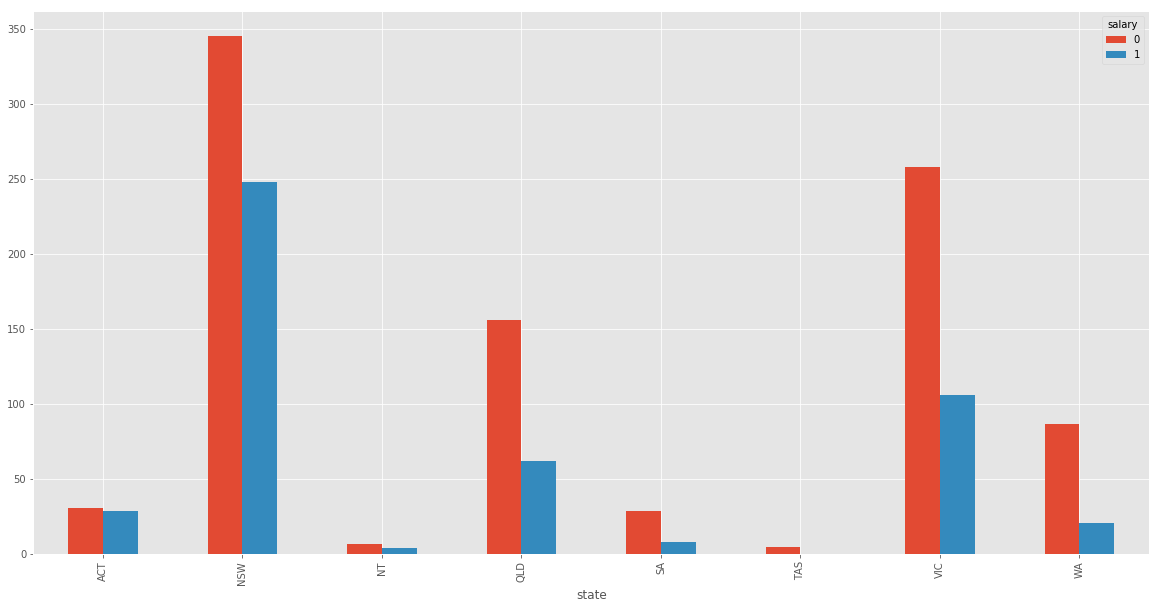

In [19]:
# see based on for each job classification , how many are fallened into which state
job_state_by_cat.unstack().plot(kind = 'bar', figsize=(20, 10))

In [20]:
# see based on for each job classification , how many are fallened into which groups
job_state_by_category = salary.groupby(['state','classification','position_lvl'])['position_lvl'].count()
job_state_by_category

state  classification                          position_lvl
ACT    Accounting                               1               1
       Administration & Office Support         -1               1
       Consulting & Strategy                    1               1
       Design & Architecture                    1               1
       Engineering                             -1               2
                                                1               1
       Government & Defence                    -1               7
                                                1               3
       Information & Communication Technology  -1              35
                                                0               2
                                                1               3
       Real Estate & Property                  -1               1
       Science & Technology                    -1               2
NSW    Accounting                              -1              35
                

C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


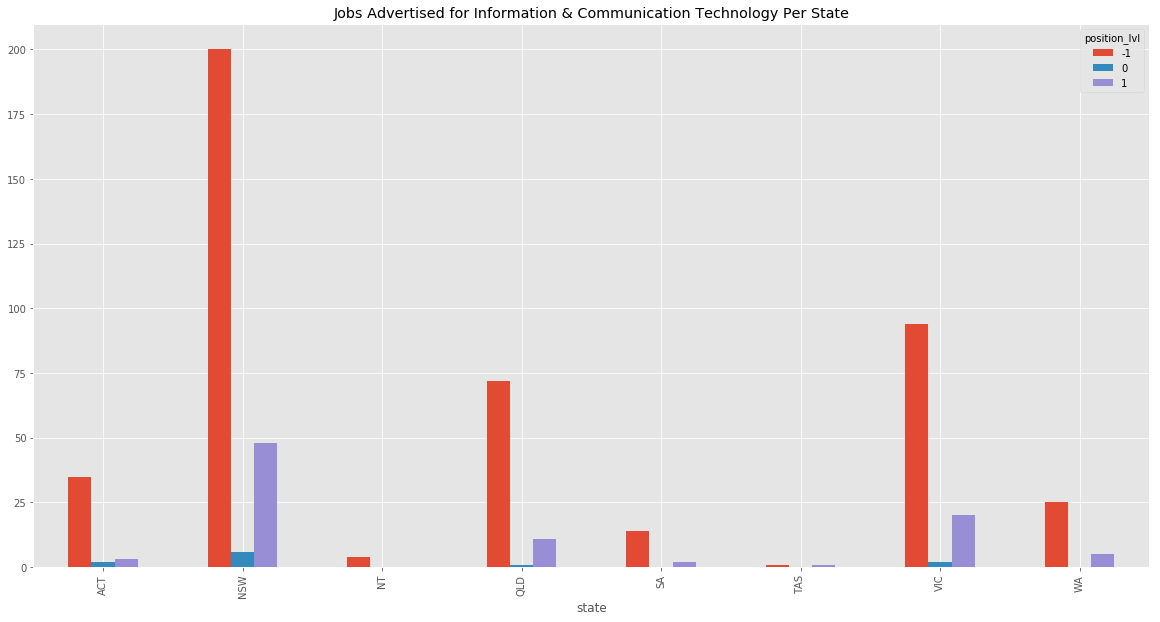

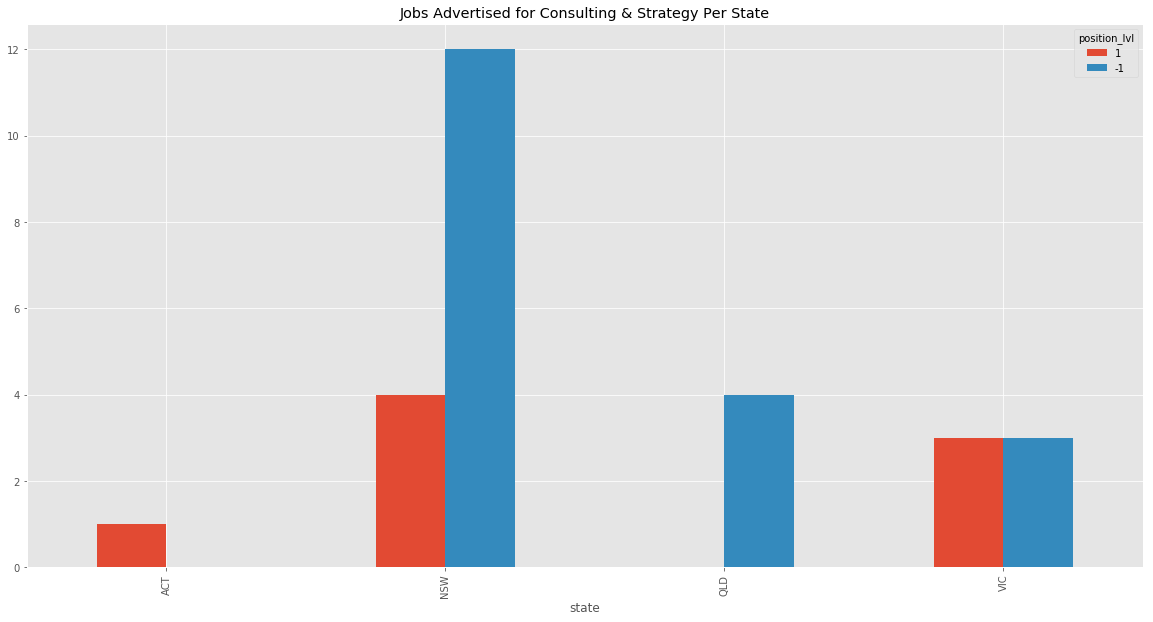

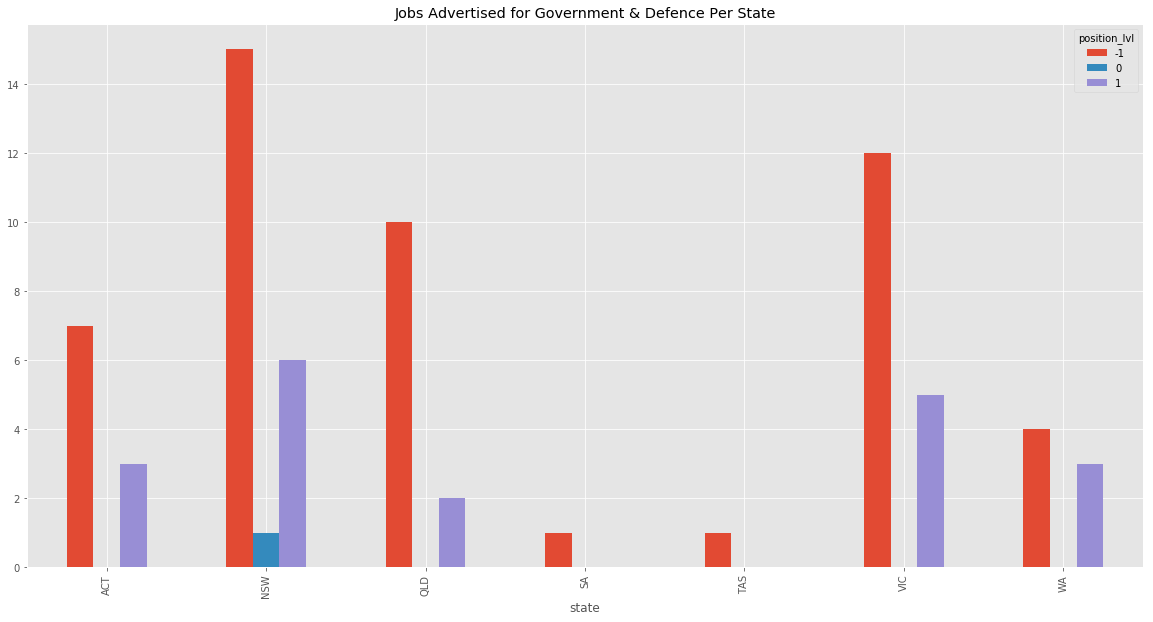

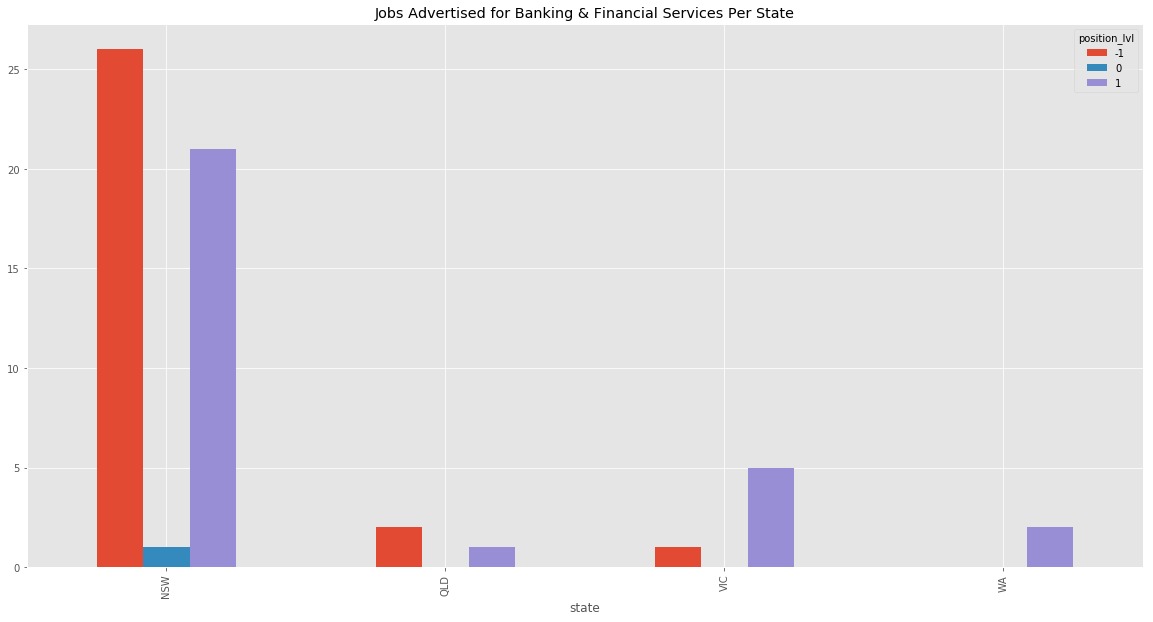

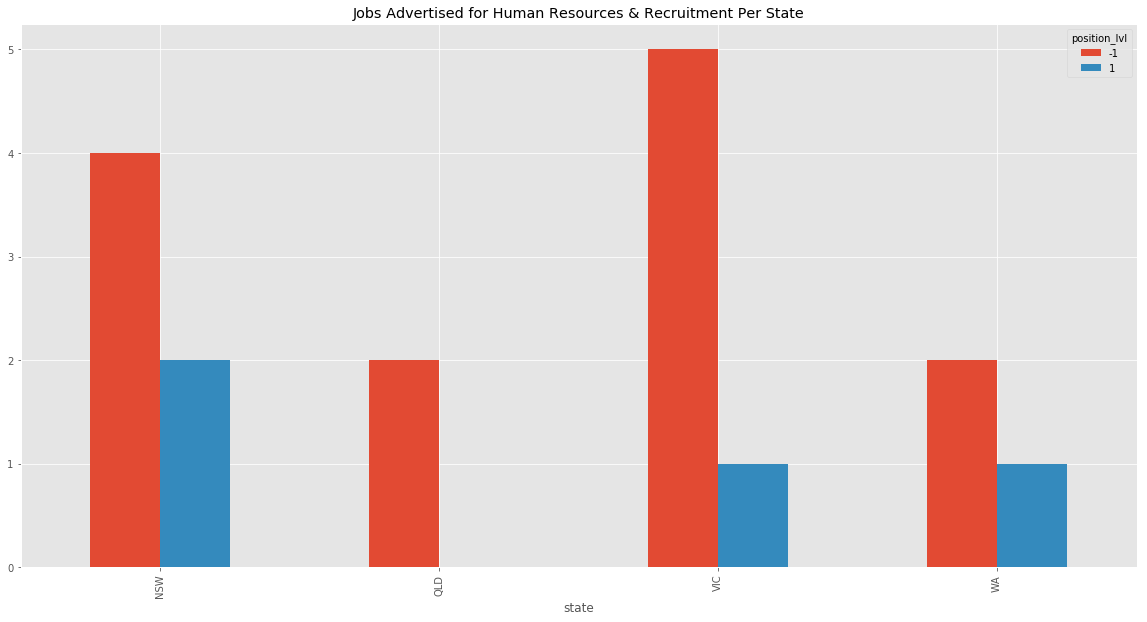

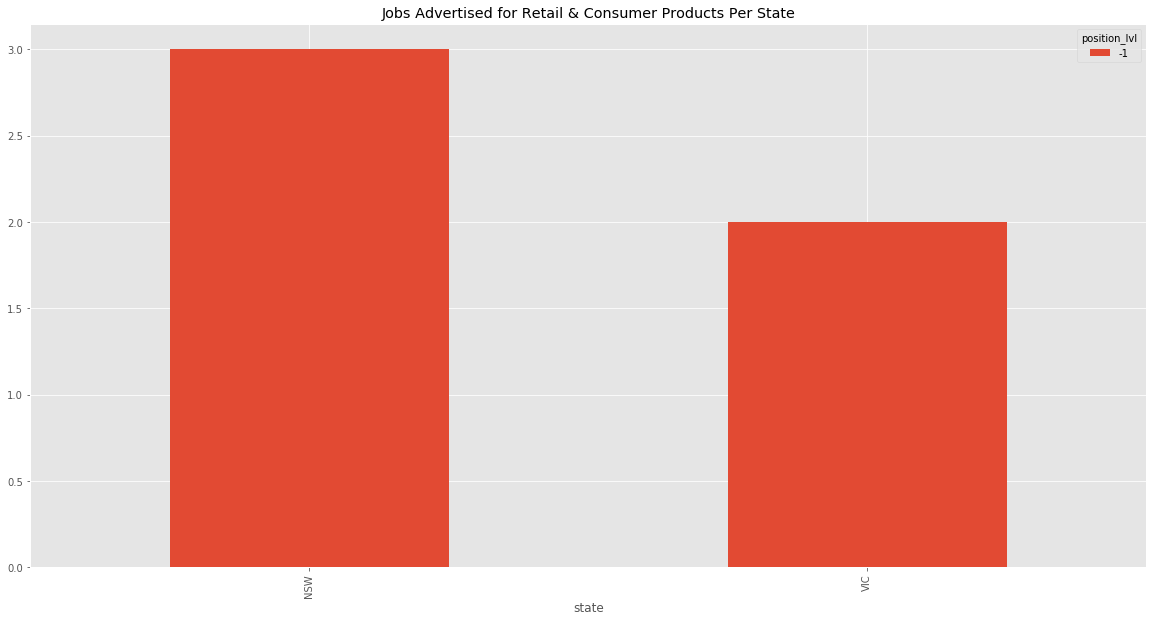

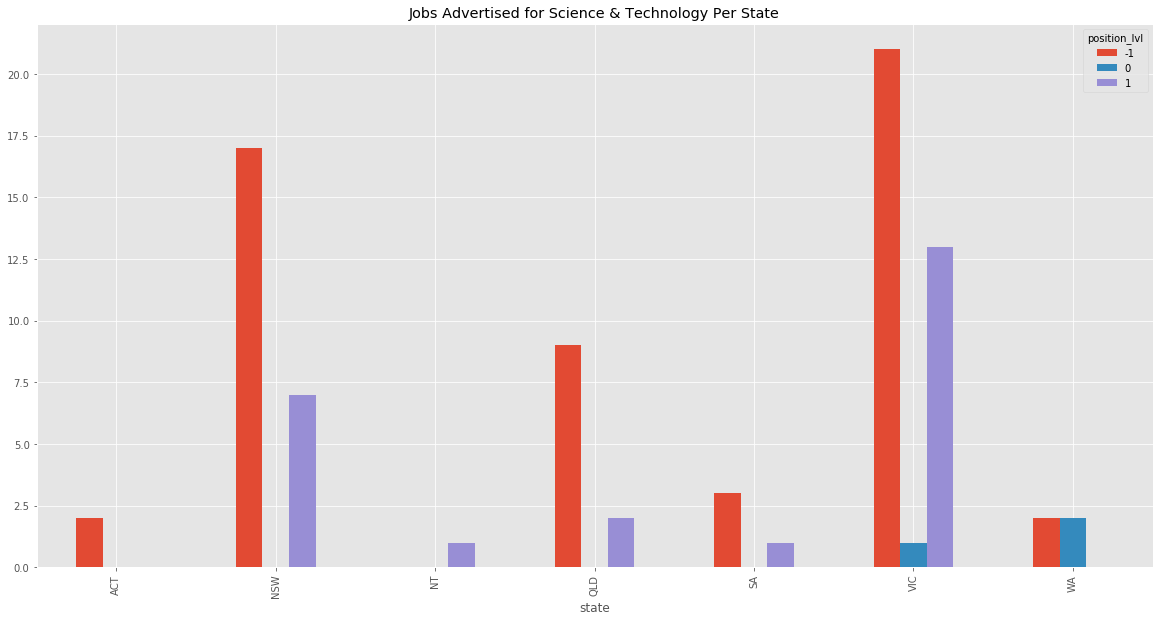

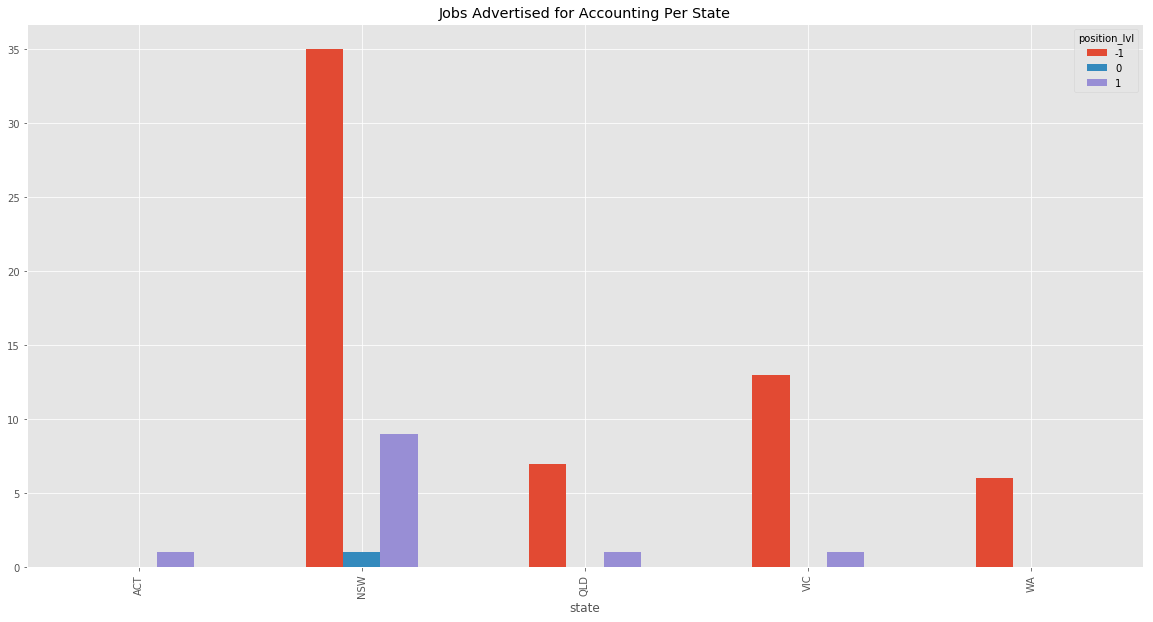

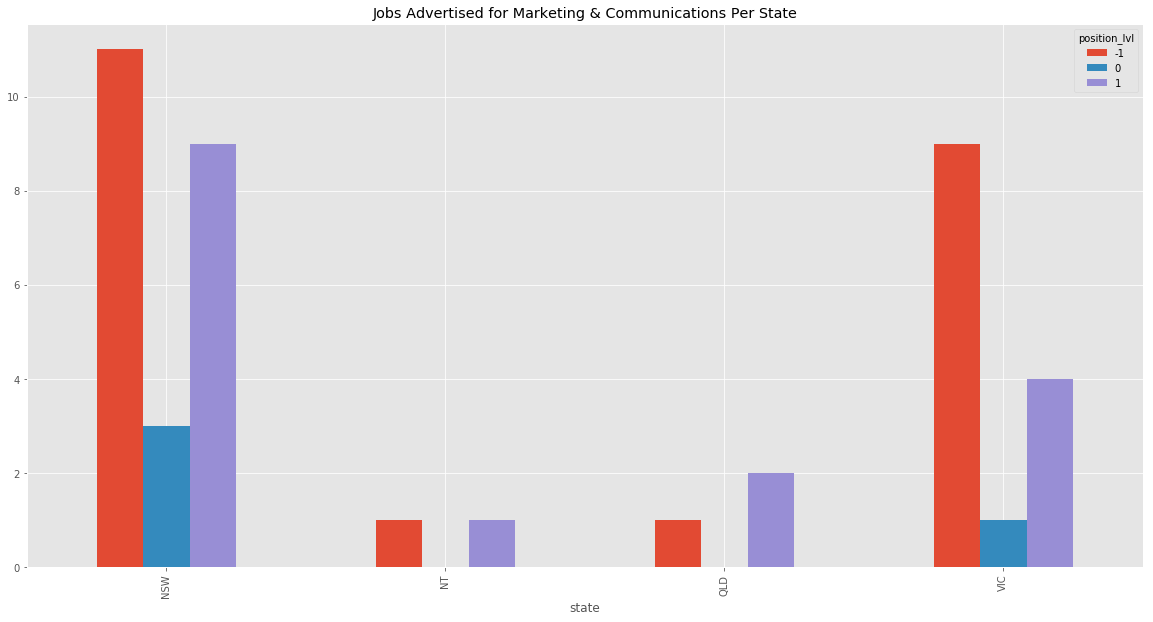

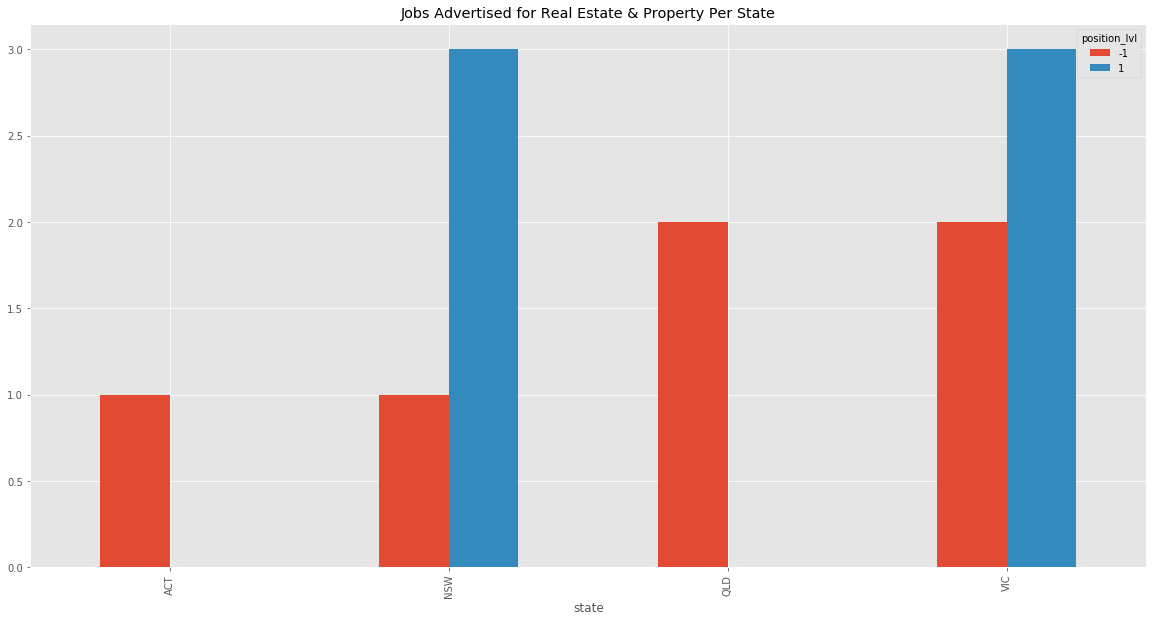

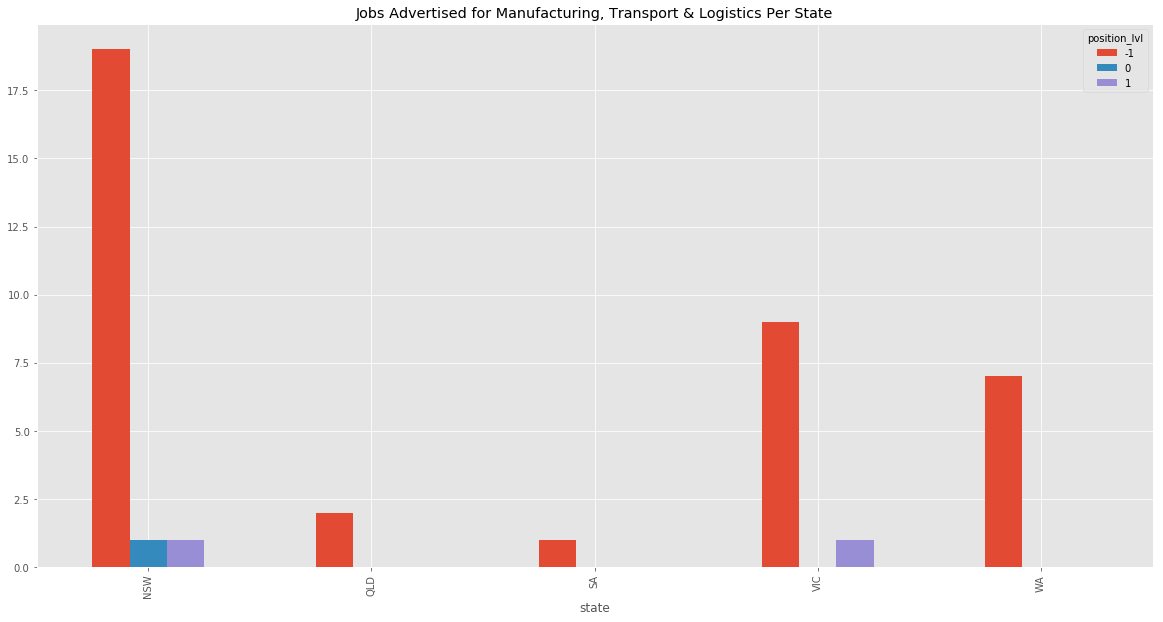

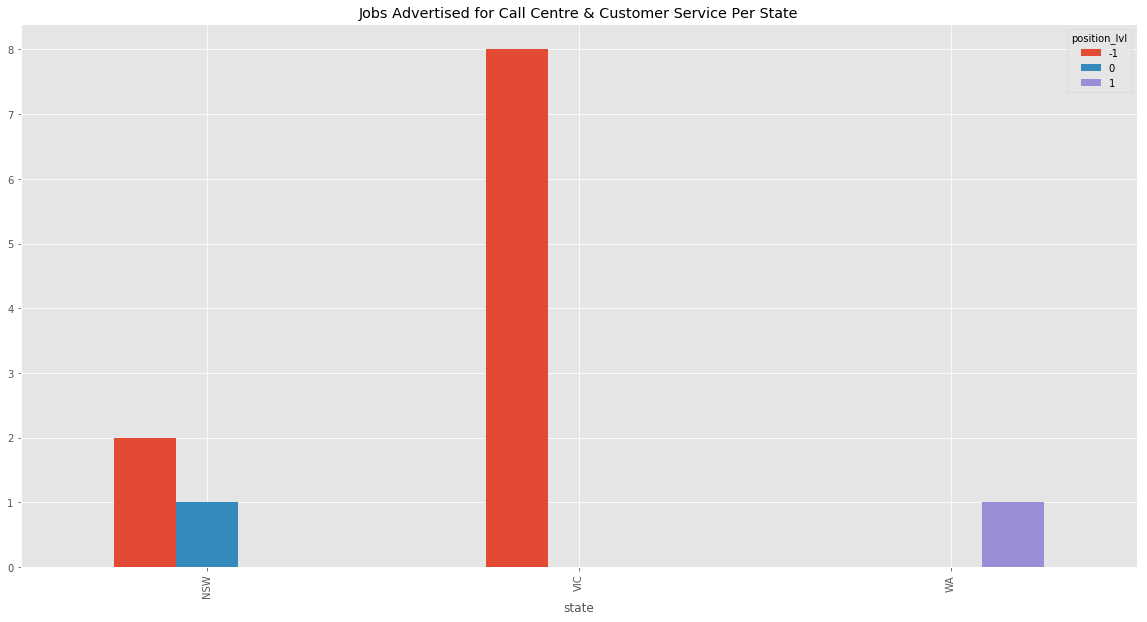

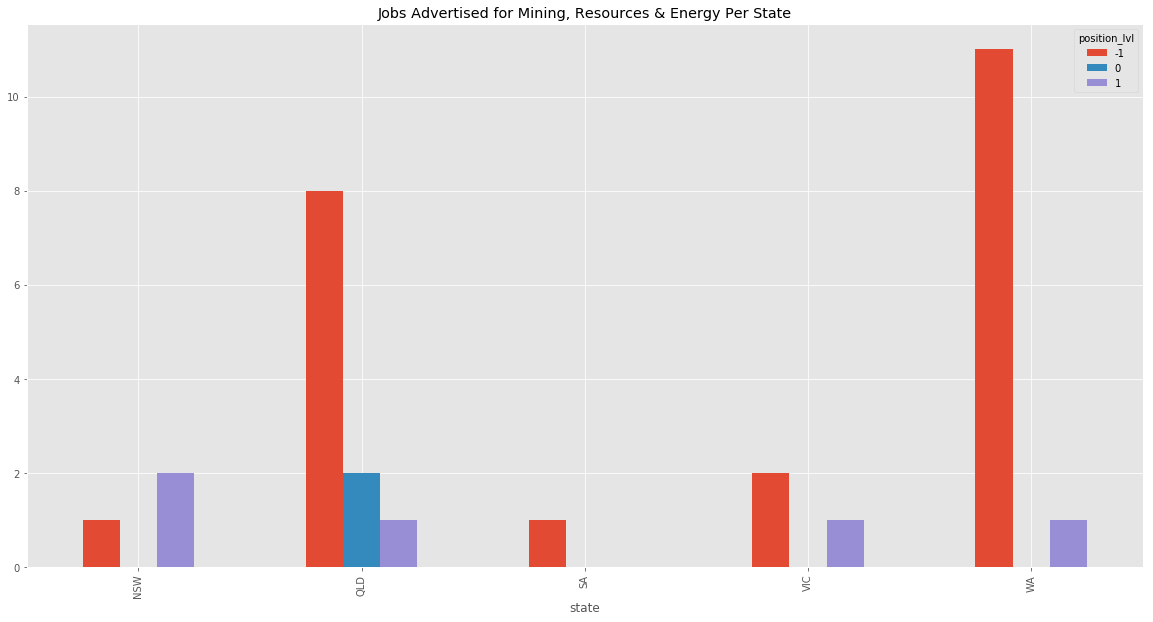

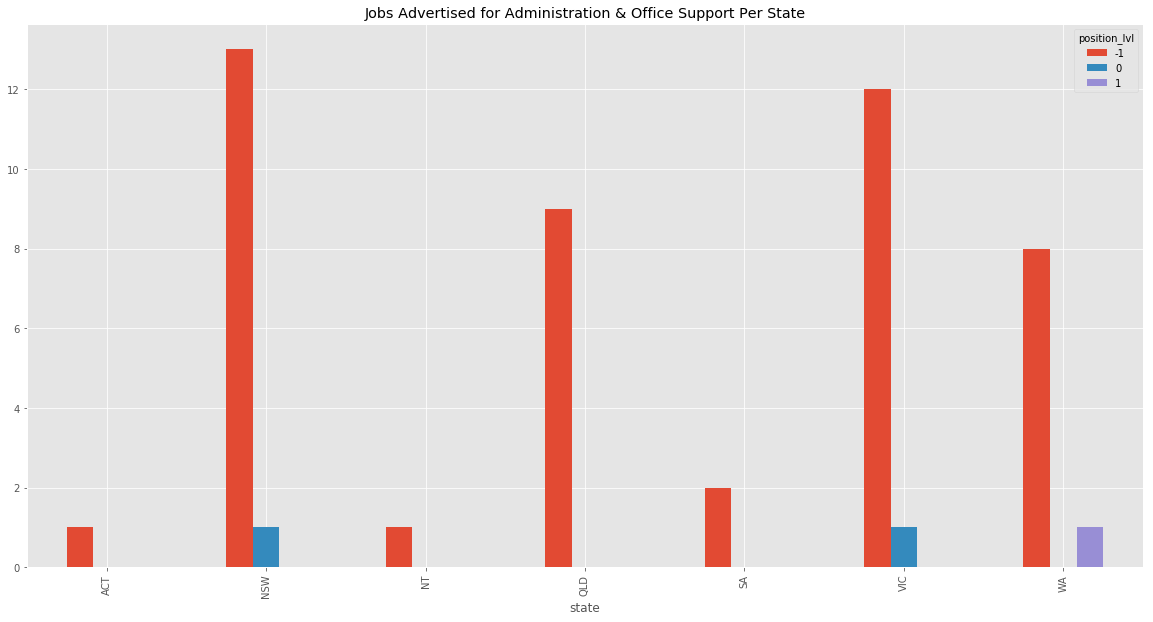

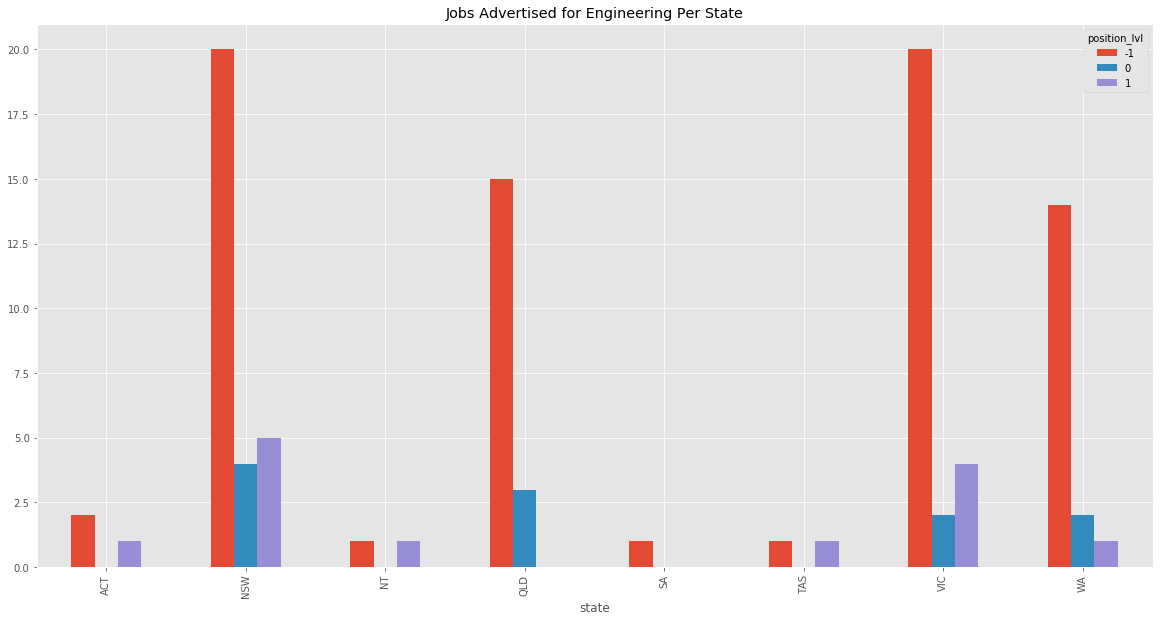

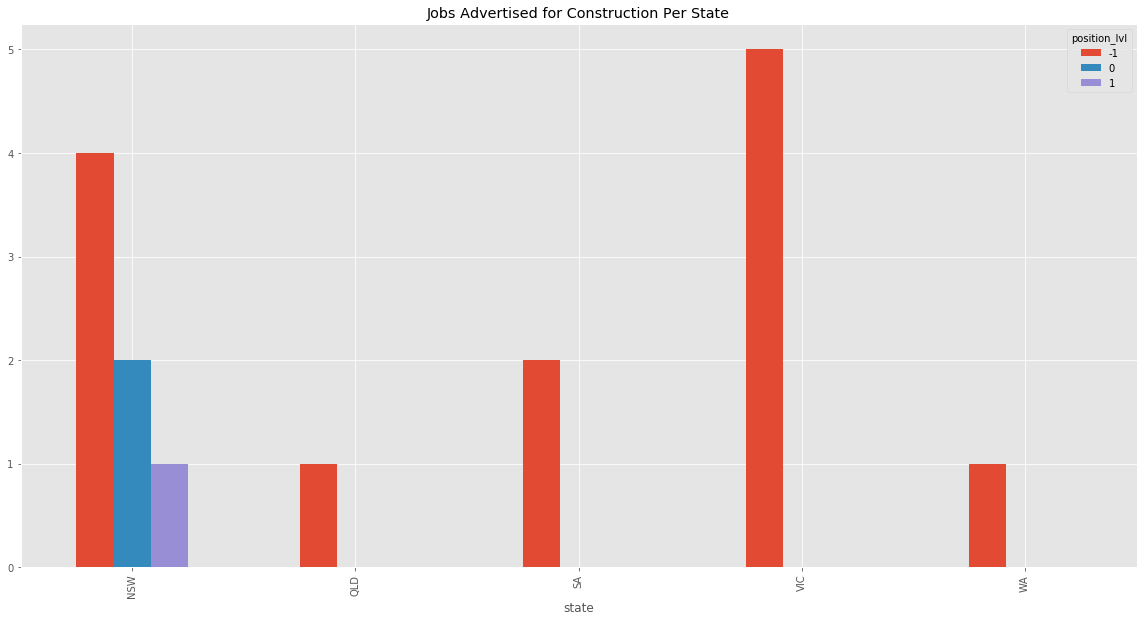

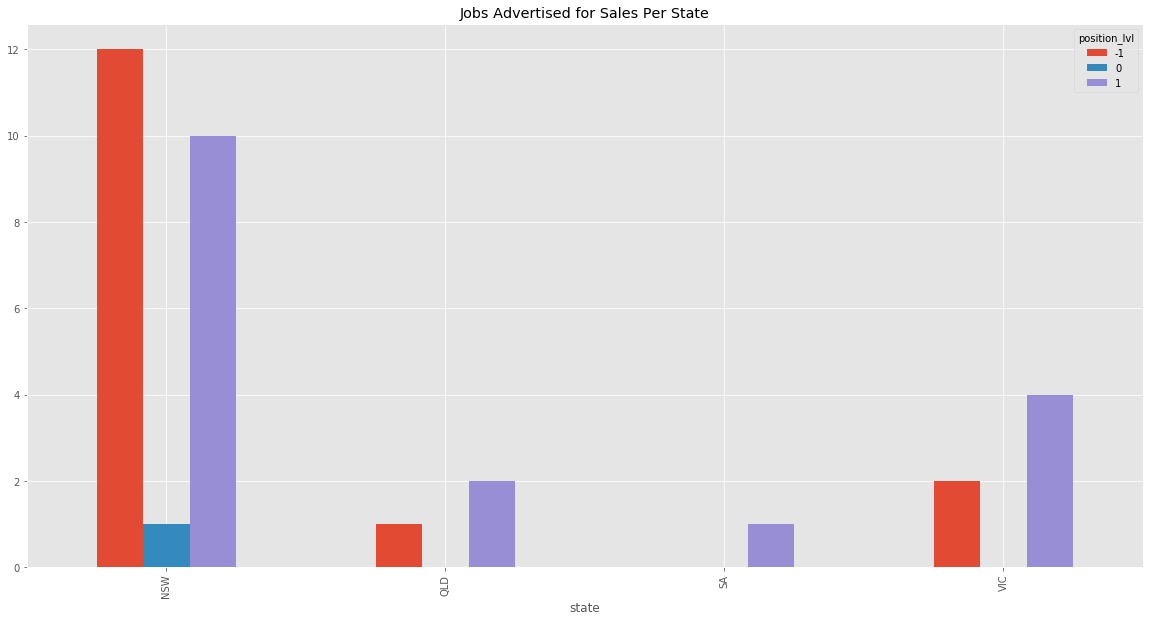

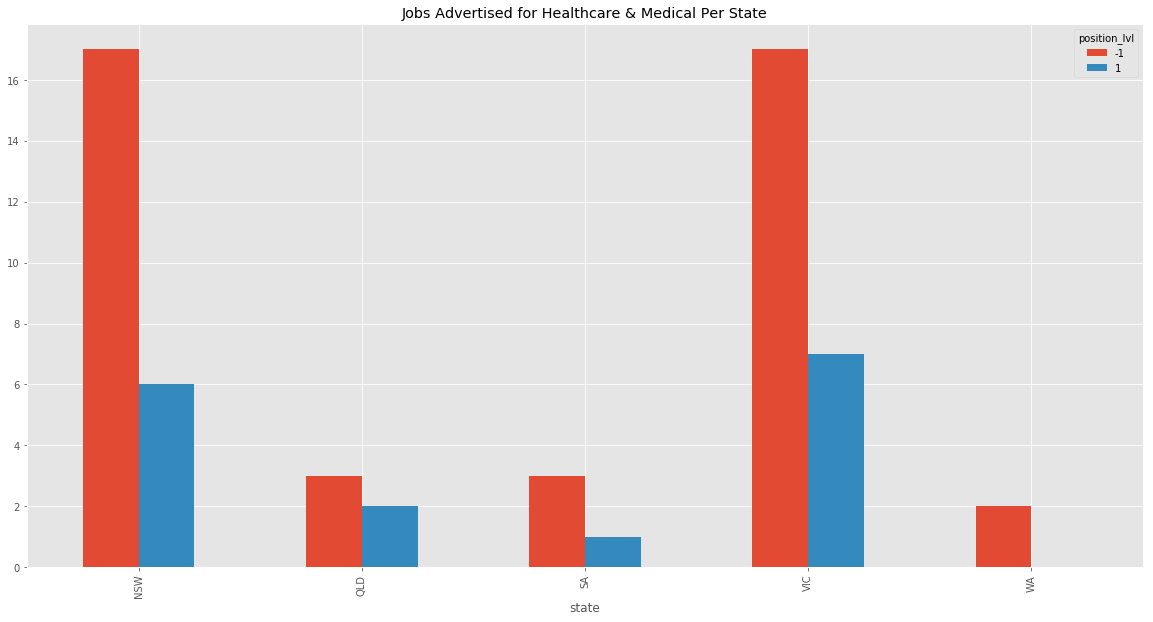

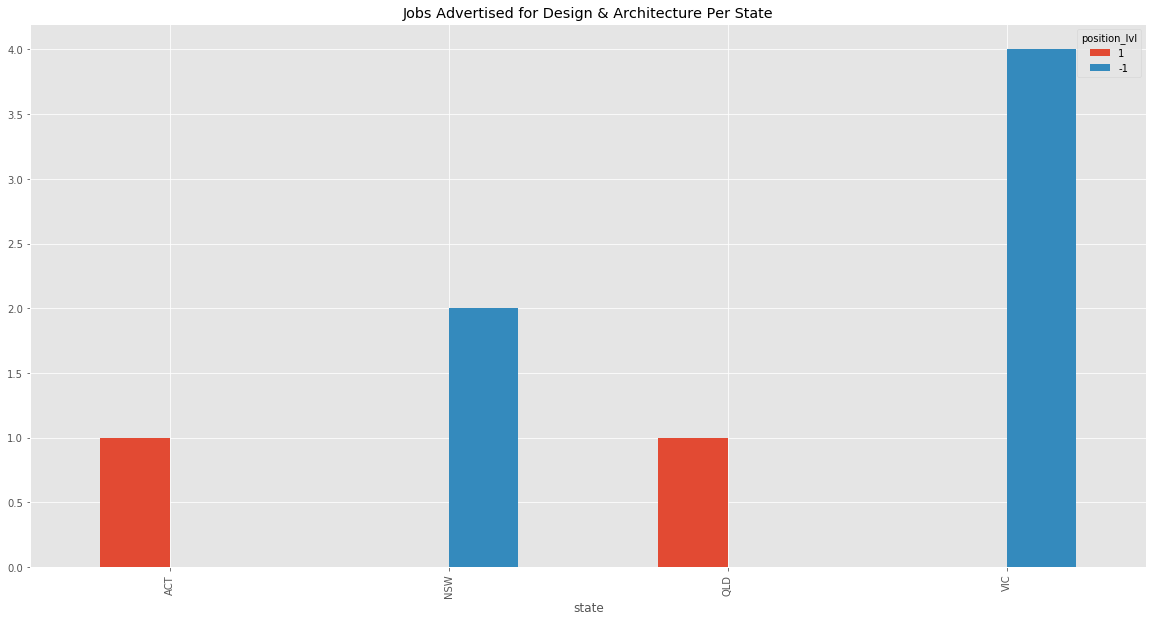

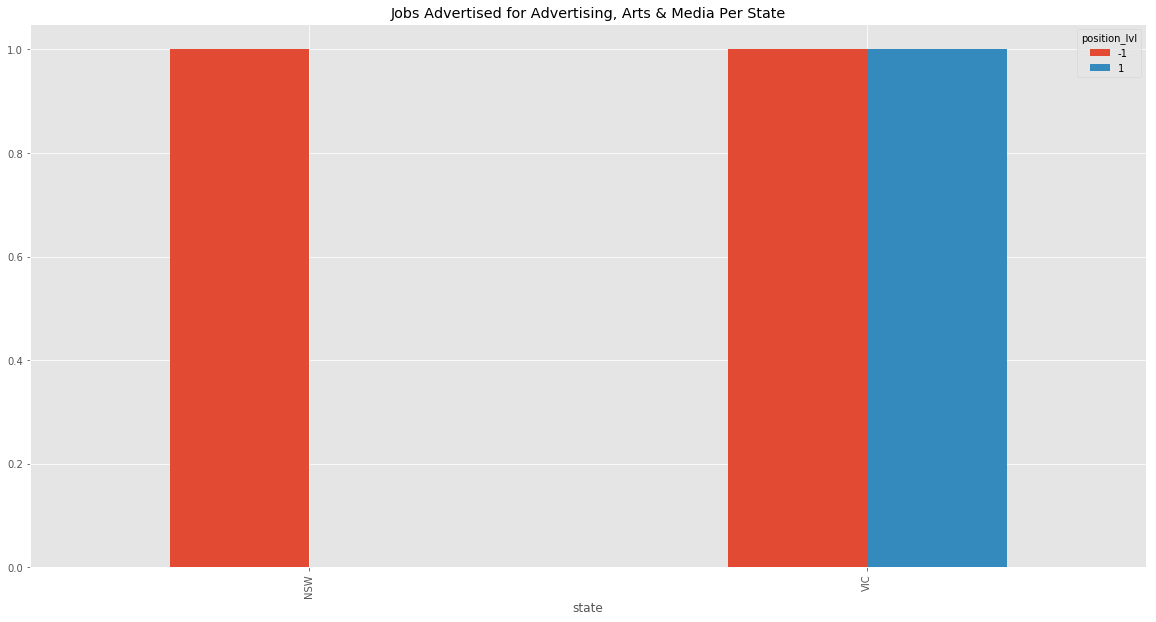

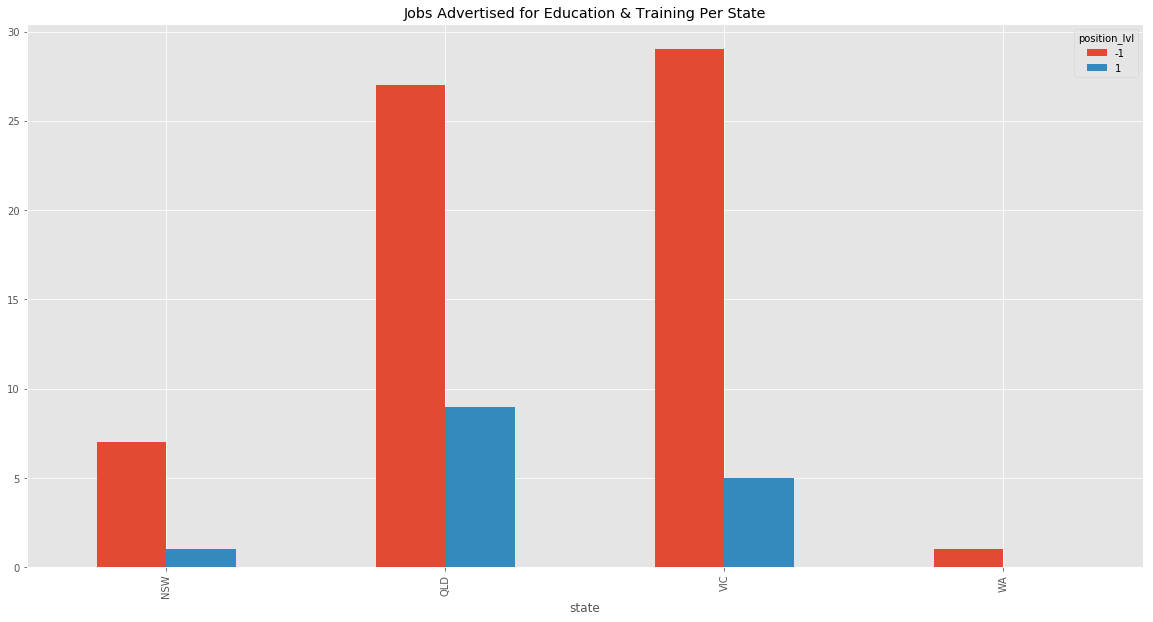

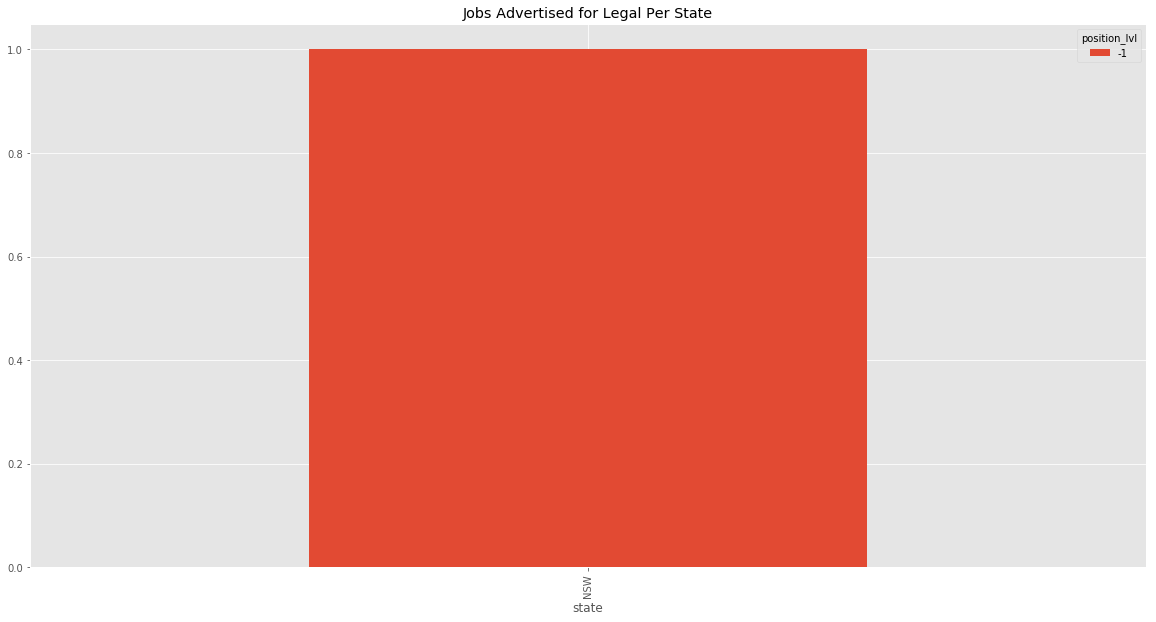

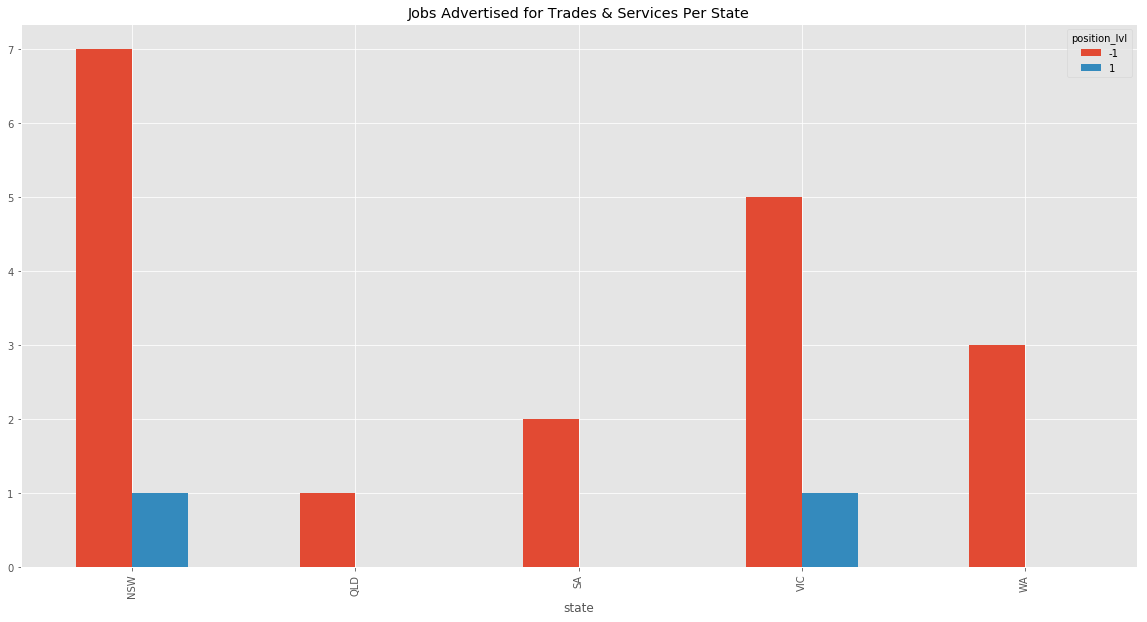

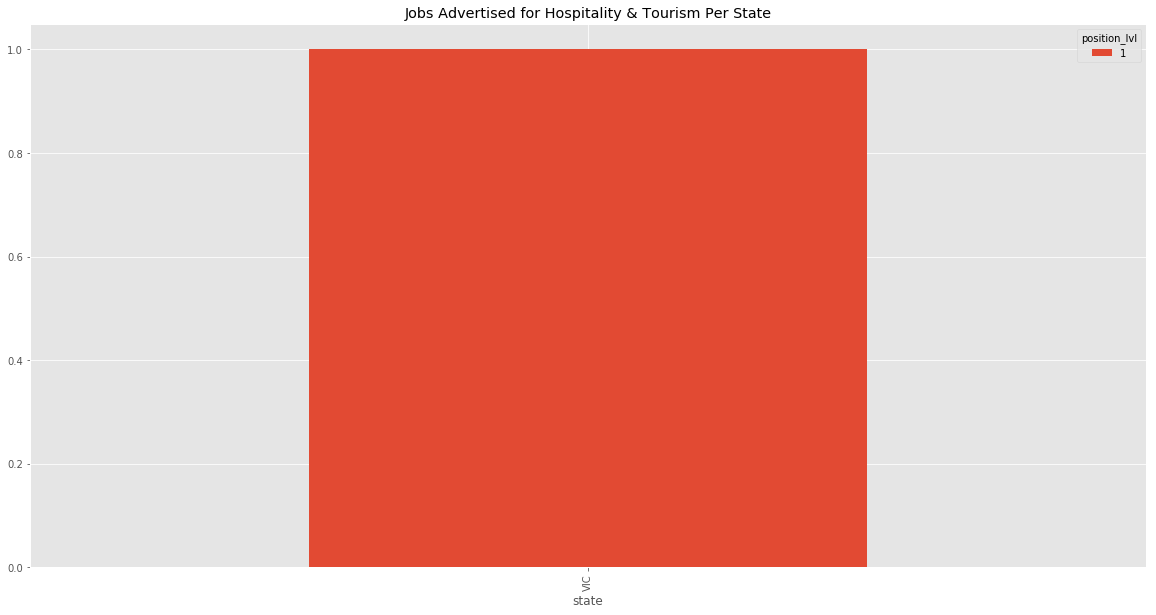

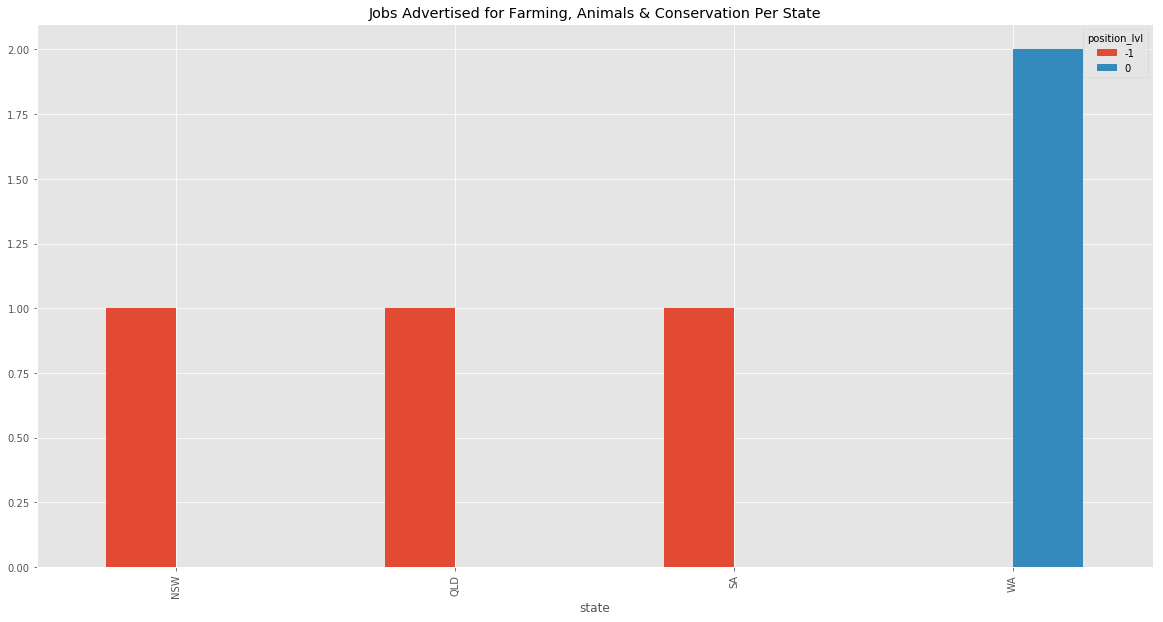

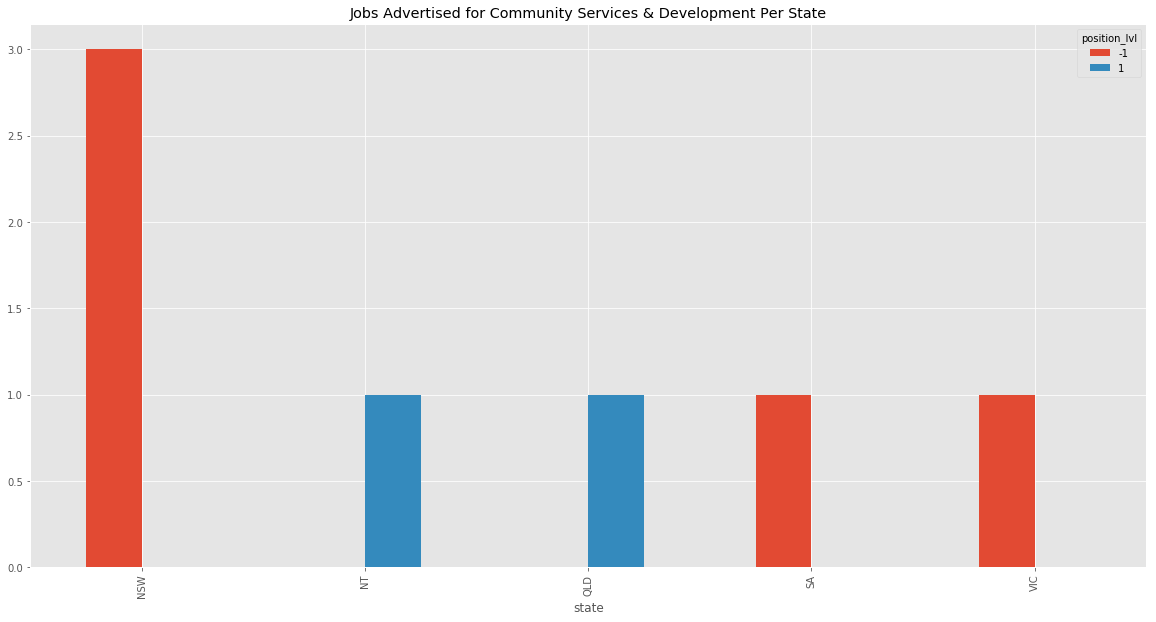

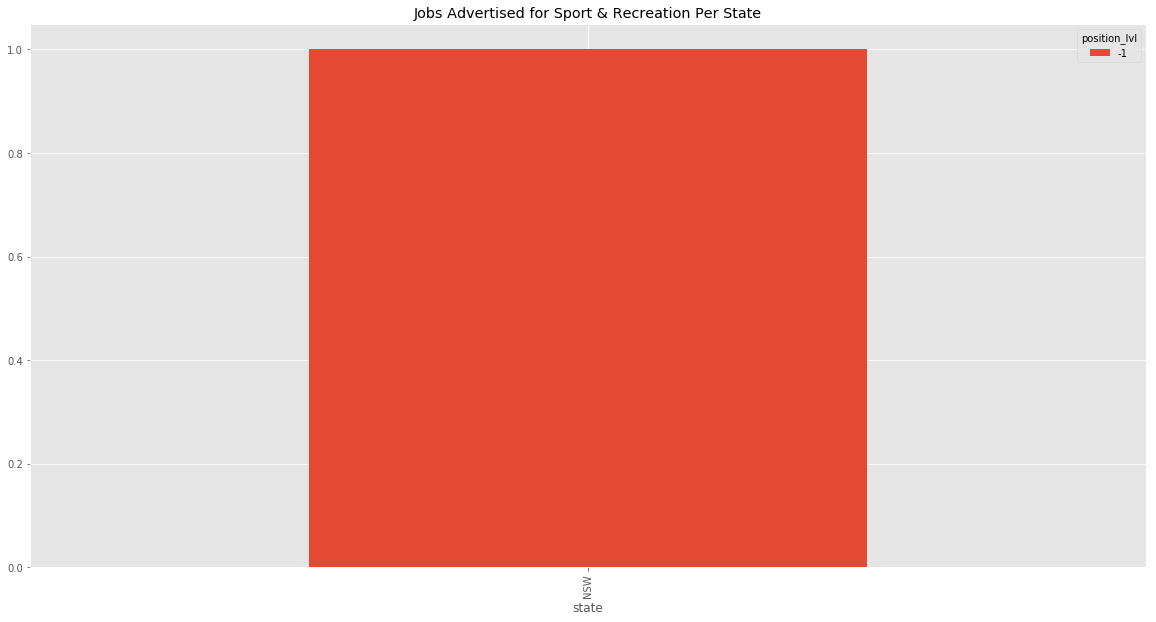

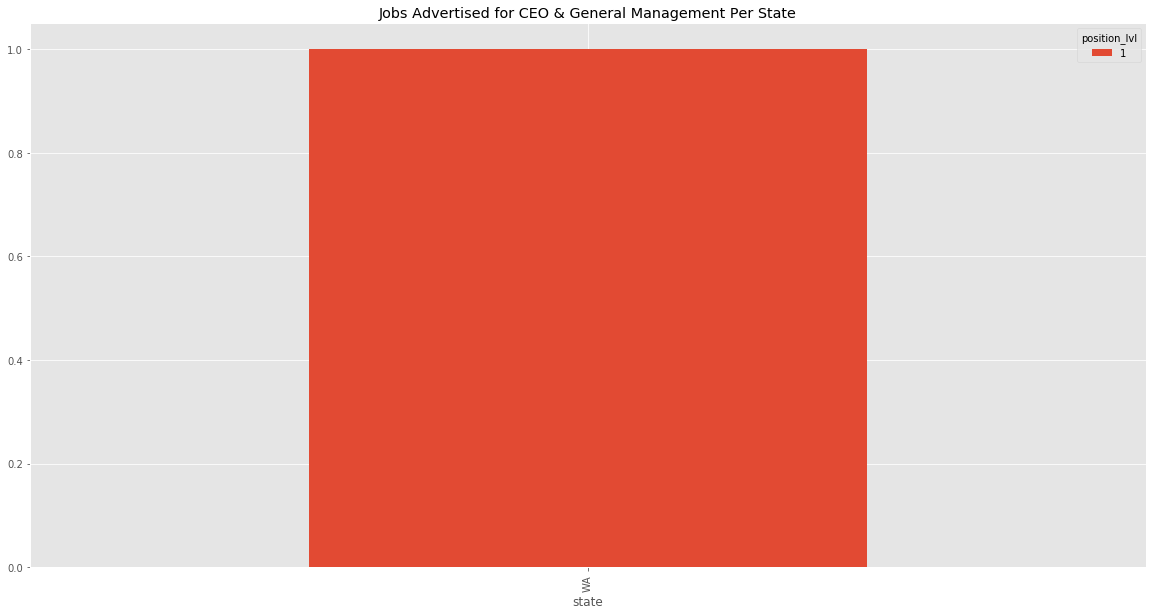

In [21]:
class_unique = salary['classification'].unique()
for c in class_unique:
    fig = job_state_by_category[:, c].unstack().plot(kind = 'bar', figsize=(20, 10))
    fig.set_title('Jobs Advertised for ' + c + ' Per State')

#### Observations based on no of jobs listing in each state for each job leavel

> Overall NSW and VIC are the highest in jobs listing in most categories but absent in some categories
> Most states and classification (industry) prefers position level 1 - normal and position level 2 - senior.
> Very hard to find junior/graduates position levels in all states/classifications

In [22]:
salary.head()

,title,salary,classification,summary,title_cat,state,position_lvl
0,Data Migration Analyst - Legal Software,0,Information & Communication Technology,The Global Transition department is responsibl...,Data Analyst,NSW,-1
1,Data Analyst,0,Information & Communication Technology,I'm looking to speak to mid to senior level Da...,Data Analyst,QLD,-1
2,SAP Master Data Analyst,0,Information & Communication Technology,One of our leading client’s is looking to hire...,Data Analyst,NSW,-1
3,Data Analyst,0,Consulting & Strategy,Energy Action is a leading national provider o...,Data Analyst,NSW,-1
4,"Data Officer, Senior Data Analyst",0,Government & Defence,We are the Australian Institute of Family Stud...,Data Analyst,VIC,1


# Data Preparations for Analysis

### Dummies categorical values

Text data such as classification and states are categorical data which are not numbers
Dummy these text cateogorical into numbers for data analysis

In [23]:
dummy = pd.get_dummies(salary, columns=['classification', 'state'], prefix=['c', 's'], drop_first=True)
dummy.head()

,title,salary,summary,title_cat,position_lvl,c_Administration & Office Support,"c_Advertising, Arts & Media",c_Banking & Financial Services,c_CEO & General Management,c_Call Centre & Customer Service,...,c_Science & Technology,c_Sport & Recreation,c_Trades & Services,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,s_WA
0,Data Migration Analyst - Legal Software,0,The Global Transition department is responsibl...,Data Analyst,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Data Analyst,0,I'm looking to speak to mid to senior level Da...,Data Analyst,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,SAP Master Data Analyst,0,One of our leading client’s is looking to hire...,Data Analyst,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Data Analyst,0,Energy Action is a leading national provider o...,Data Analyst,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,"Data Officer, Senior Data Analyst",0,We are the Australian Institute of Family Stud...,Data Analyst,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Stemming

This technique is called stemming , it normalize words to a common root
Example:

* Science
* Sciences
* Scientist

common root word would be -> scien

In [24]:
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()

In [25]:
def stem_sentences(sentence):
    
    #sentence = sentence.replace("[^a-zA-Z\d\s.]", " ")    
    line = re.sub(r"[^a-zA-Z\d\s.]+", " ", str(sentence))
    tokens = line.replace(".", " ").split()
    stemmed_tokens = [stemmer.stem(token.strip()) for token in tokens]
    return ' '.join(stemmed_tokens)

#shorter version can also be used as written below
#dummy['titlesummary'].str.split().apply(lambda x: [stemmer.stem(y) for y in x])

In [26]:
dummy['stem'] = dummy['summary'].apply(stem_sentences)

In [27]:
dummy.drop(columns=['title', 'summary'], inplace=True)

In [28]:
dummy.head()

,salary,title_cat,position_lvl,c_Administration & Office Support,"c_Advertising, Arts & Media",c_Banking & Financial Services,c_CEO & General Management,c_Call Centre & Customer Service,c_Community Services & Development,c_Construction,...,c_Sport & Recreation,c_Trades & Services,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,s_WA,stem
0,0,Data Analyst,-1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,the global transit depart is respons for the p...
1,0,Data Analyst,-1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,I m look to speak to mid to senior level data ...
2,0,Data Analyst,-1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,one of our lead client s is look to hire an sa...
3,0,Data Analyst,-1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,energi action is a lead nation provid of innov...
4,0,Data Analyst,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,We are the australian institut of famili studi...


### Save Dummy File to CSV

Now files are ready to be analysized

In [29]:
# save file for data analysis
dummy.to_csv('./datasets/dummy_stem.csv')